In [1]:
import io
import json
import requests
import pandas as pd
from PIL import Image
from bs4 import BeautifulSoup
from IPython.display import display
from multiprocessing import Pool

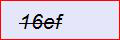

'ASP.NET_SessionId=zfqiob1vcpndoo3ckpduog2j'

In [2]:
s = requests.Session()
url = "https://www.students.gtu.ac.in/Handler.ashx"
r = s.get(url)
display(Image.open(io.BytesIO(r.content)))
r.headers['Set-Cookie'][:r.headers['Set-Cookie'].index(";")]

In [3]:
c = "16ef"

In [4]:
url = "https://www.students.gtu.ac.in/"

headers = {
    "Host": "www.students.gtu.ac.in",
    "Content-Length": "683",
    "Cache-Control": "max-age=0",
    "Sec-Ch-Ua": "\"Not A(Brand\";v=\"24\", \"Chromium\";v=\"110\"",
    "Sec-Ch-Ua-Mobile": "?0",
    "Sec-Ch-Ua-Platform": "\"Windows\"",
    "Upgrade-Insecure-Requests": "1",
    "Origin": "https://www.students.gtu.ac.in",
    "Content-Type": "application/x-www-form-urlencoded",
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0.5481.78 Safari/537.36",
    "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7",
    "Sec-Fetch-Site": "same-origin",
    "Sec-Fetch-Mode": "navigate",
    "Sec-Fetch-User": "?1",
    "Sec-Fetch-Dest": "document",
    "Referer": "https://www.students.gtu.ac.in/",
    "Accept-Encoding": "gzip, deflate",
    "Accept-Language": "en-US,en;q=0.9",
    "Cookie": r.headers['Set-Cookie'][:r.headers['Set-Cookie'].index(";")]
}

kitoptions = {
  "enable-local-file-access": None ,
}

In [7]:
def f1(soup):
    soup = BeautifulSoup(str(soup.find(id='TblStdInfo')), 'html.parser')
    rows = soup.find_all('tr')
    table_data = {}
    for row in rows:
        cells = row.find_all('td')
        if len(cells) == 2:
            key = cells[0].text.strip()[:-2]
            value = cells[1].text.strip()
            table_data[key] = value
    return table_data

def f2(soup):
    soup = BeautifulSoup(str(soup.find(id='div2')), 'html.parser')
    tables = soup.find_all('table')
    table_data = {}
    for table in tables:
        rows = table.find_all('tr')
        header = [th.text.strip() for th in rows[0].find_all('th')]
        for row in rows[1:]:
            values = [td.text.strip() for td in row.find_all('td')]
            row_data = {}
            for i in range(len(header)):
                row_data[header[i]] = values[i]
            table_data.update(row_data)
    return table_data

def vtodur(enr):
    payload = f"__EVENTTARGET=&__EVENTARGUMENT=&__VIEWSTATE=%2FwEPDwULLTE1NzM5Mzk0MzkPZBYCAgMPZBYKAgkPDxYCHgRUZXh0ZWRkAgsPFgIeB1Zpc2libGVoZAINDxYCHwFoFgQCAQ88KwARAgEQFgAWABYADBQrAABkAgMPPCsAEQIBEBYAFgAWAAwUKwAAZAIRDzwrABECARAWABYAFgAMFCsAAGQCEw8WAh8BaGQYBAUeX19Db250cm9sc1JlcXVpcmVQb3N0QmFja0tleV9fFgEFBmltZ3JlZgUJR3JpZFZpZXcxD2dkBQtncmR2TGFzdEV4bQ9nZAUFZ3JkdjIPZ2SP4LZcQwZul8DBECEWkW4aVijr8%2B7oo1NkAEpQXnjlTQ%3D%3D&__VIEWSTATEGENERATOR=CA0B0334&__EVENTVALIDATION=%2FwEdAAULuYTcS2Bbv0sXcXqDGFc4ZAOKKrbaqBuZEOgDujbIJE7faODj1tnvTzvom6kOTSTV8jFig0gbXGgleszPUj0LPOaW1pQztoQA36D1w%2F%2BbXYJy%2FQm9%2BLbhUieKyUTwFjkARq6t63XgTobACmevO6Eh&txtEnrollNo={enr}&CodeNumberTextBox={c}&btnSubmit=Search..."
    res = requests.request("POST", url, data=payload, headers=headers).text
    soup = BeautifulSoup(res, 'html.parser')
    d1 = f1(soup)
    d2 = f2(soup)
    d1.update(d2)
    if d1 == {} : return {'Enrollment No.':enr}
    return d1

with Pool(15) as pp:
  dd = pp.map(vtodur,range(190280111001,190280111160))

df = pd.DataFrame(dd)
df = df.apply(pd.to_numeric, errors= 'ignore' )
df.to_excel("op.xlsx")

👈 download <font color='yellow'>op.xlsx</font> from left side bar by double clicking it